In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


# inputs = tf.keras.Input(shape=(3,))
# x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
# outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
# model = tf.keras.Model(inputs=inputs, outputs=outputs)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
l = []
a = []
start = time.time()
t = []
loss, accuracy = model.evaluate(x_test, y_test)

while loss > 0.09:
    l.append(loss)
    print(loss, accuracy)
    LOSS = loss
    a.append(accuracy)
    t.append(time.time() - start)
    model.fit(x_train, y_train, epochs=3)
    loss, accuracy = model.evaluate(x_test, y_test)
    if loss > LOSS:
        break
 

313/313 [==============================] - 1s 4ms/step - loss: 2.3242 - accuracy: 0.0648
2.324239492416382 0.06480000168085098
Epoch 1/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2617 - accuracy: 0.9225
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1065 - accuracy: 0.9669
Epoch 3/3
313/313 [==============================] - 1s 5ms/step - loss: 0.0944 - accuracy: 0.9713
0.09441100805997849 0.9713000059127808
Epoch 1/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0533 - accuracy: 0.9830
Epoch 2/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0419 - accuracy: 0.9869
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 0.0882 - accuracy: 0.9769


313/313 [==============================] - 1s 5ms/step - loss: 0.0882 - accuracy: 0.9769
[2.324239492416382, 0.09441100805997849]
[0.06480000168085098, 0.9713000059127808]
[1.7731361389160156, 56.72002959251404]


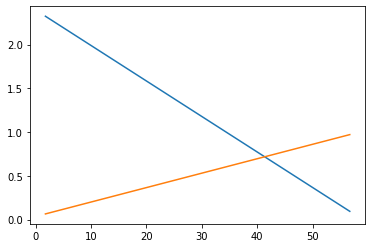

0.0882059782743454 0.9768999814987183


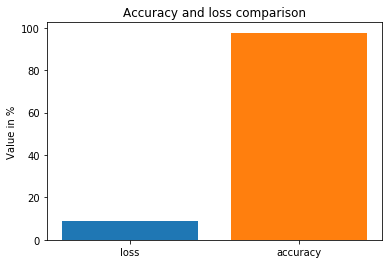

In [3]:
loss, accuracy = model.evaluate(x_test, y_test)
print(l)
print(a)
print(t)
plt.plot(t, l)
plt.plot(t, a)
plt.show()
print(loss, accuracy)

plt.title('Accuracy and loss comparison')
plt.bar('loss', loss*100)
plt.bar("accuracy", accuracy*100)
plt.ylabel('Value in %')
plt.show()

In [4]:
model.save("Numbers_identification.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Numbers_identification.model/assets


In [5]:
new_model = tf.keras.models.load_model('Numbers_identification.model')

In [6]:
print(x_train.shape, x_test.shape)
results = model.predict([x_test])

(60000, 28, 28) (10000, 28, 28)


In [7]:
print(np.argmax(results[100]))

6


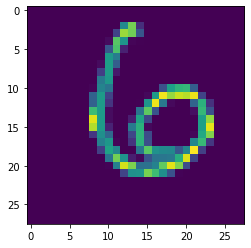

In [8]:
plt.imshow(x_test[100])